In [4]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt

In [5]:
data = pd.read_parquet('/Users/roman/Downloads/rail_data_cleaned_20230728132300.parquet')

Merge the Station Rail Name Reference Table with the API data in order to provide more readable station names.
How would you determine the top 10 most frequently visited stations in a day?
What information can be explored to understand train delays?
Are certain stations busier than others at certain times?


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37100 entries, 8 to 94243
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   route_id                37100 non-null  object        
 1   unique_id               37100 non-null  object        
 2   service_start_date      37100 non-null  object        
 3   update_origin           36515 non-null  object        
 4   train_platform          37100 non-null  object        
 5   working_time_pass       0 non-null      datetime64[ns]
 6   working_time_arrival    37100 non-null  datetime64[ns]
 7   working_time_departure  37100 non-null  datetime64[ns]
 8   planned_time_arrival    33855 non-null  datetime64[ns]
 9   planned_time_departure  33580 non-null  datetime64[ns]
 10  pass                    0 non-null      object        
 11  platform                34114 non-null  object        
 12  train_length            10595 non-null  object

In [55]:
data.describe()

C:\Users\roman\AppData\Local\Temp\ipykernel_12832\3175101911.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  data.describe()
C:\Users\roman\AppData\Local\Temp\ipykernel_12832\3175101911.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  data.describe()
C:\Users\roman\AppData\Local\Temp\ipykernel_12832\3175101911.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  data.describe()
C:\U

,route_id,unique_id,service_start_date,update_origin,train_platform,working_time_pass,working_time_arrival,working_time_departure,planned_time_arrival,planned_time_departure,pass,platform,train_length,actual_arrival_time,actual_departure_time,is_delayed_arrival,is_delayed_departure
count,37100,37100,37100,36515,37100,0,37100,37100,33855,33580,0,34114,10595,31769,34384,37100,37100
unique,6545,6364,3,6,2603,0,3941,3922,2153,2132,0,93,11,2035,2031,2,2
top,202307288955129,Y55129,2023-07-27,CIS,LNDNBDE,NaN,2023-07-27 00:01:00,2023-07-27 17:35:00,2023-07-27 17:35:00,2023-07-27 17:35:00,NaN,2,8,2023-07-27 17:50:00,2023-07-27 17:48:00,False,False
freq,120,120,20548,14433,317,NaN,81,72,111,123,NaN,12802,3076,99,143,34706,34489
first,NaN,NaN,NaN,NaN,NaN,NaN,2023-07-27 00:01:00,2023-07-27 00:01:00,2023-07-27 00:01:00,2023-07-27 00:01:00,NaN,NaN,NaN,2023-07-27 00:00:00,2023-07-27 00:00:00,NaN,NaN
last,NaN,NaN,NaN,NaN,NaN,NaN,2023-07-29 02:15:00,2023-07-29 02:16:00,2023-07-29 01:30:00,2023-07-29 01:30:00,NaN,NaN,NaN,2023-07-29 02:15:00,2023-07-29 02:16:00,NaN,NaN


In [57]:
summary_numerical = data['train_length'].value_counts()

print(summary_numerical)

8     3076
5     1875
4     1574
10    1103
12    1054
3      866
6      566
2      425
7       45
11       6
9        5
Name: train_length, dtype: int64


In [7]:
data.head()

,route_id,unique_id,service_start_date,update_origin,train_platform,working_time_pass,working_time_arrival,working_time_departure,planned_time_arrival,planned_time_departure,pass,platform,train_length,actual_arrival_time,actual_departure_time,is_delayed_arrival,is_delayed_departure
8,202307277679020,L79020,2023-07-27,Darwin,STFD,NaT,2023-07-27 00:03:00,2023-07-27 00:03:30,NaT,NaT,None,5,None,2023-07-27 00:53:00,2023-07-27 00:53:00,True,True
10,202307277679020,L79020,2023-07-27,Darwin,SPNY205,NaT,2023-07-27 00:07:00,2023-07-27 00:13:30,NaT,NaT,None,None,None,2023-07-27 00:57:00,2023-07-27 00:58:00,True,True
16,202307277679020,L79020,2023-07-27,Darwin,PADTLL,NaT,2023-07-27 00:30:30,2023-07-27 00:31:00,NaT,NaT,None,B,None,2023-07-27 01:07:00,2023-07-27 01:07:00,True,True
17,202307277679020,L79020,2023-07-27,Darwin,WBRNPKS,NaT,2023-07-27 00:33:00,2023-07-27 00:35:00,NaT,NaT,None,A,None,2023-07-27 01:09:00,2023-07-27 01:10:00,True,True
22,202307277674553,L74553,2023-07-27,TD,SVNOAKS,NaT,2023-07-27 21:53:00,2023-07-27 21:54:30,2023-07-27 21:53:00,2023-07-27 21:54:00,None,1,8,NaT,NaT,False,False


In [8]:
reference_data=pd.read_csv('/Users/roman/Downloads/RailReferences.csv')

In [9]:
reference_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2628 entries, 0 to 2627
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   AtcoCode              2628 non-null   object 
 1   TiplocCode            2628 non-null   object 
 2   CrsCode               2628 non-null   object 
 3   StationName           2628 non-null   object 
 4   StationNameLang       0 non-null      float64
 5   GridType              2627 non-null   object 
 6   Easting               2628 non-null   int64  
 7   Northing              2628 non-null   int64  
 8   CreationDateTime      2628 non-null   object 
 9   ModificationDateTime  2628 non-null   object 
 10  RevisionNumber        2628 non-null   int64  
 11  Modification          2628 non-null   object 
dtypes: float64(1), int64(3), object(8)
memory usage: 246.5+ KB


In [10]:
reference_data.head()

,AtcoCode,TiplocCode,CrsCode,StationName,StationNameLang,GridType,Easting,Northing,CreationDateTime,ModificationDateTime,RevisionNumber,Modification
0,9100PENZNCE,PENZNCE,PNZ,Penzance Rail Station,NaN,U,147588,30599,2003-11-04T00:00:00,2011-09-30T14:47:28,2,rev
1,9100STIVES,STIVES,SIV,St Ives (Cornwall) Rail Station,NaN,U,151947,40127,2005-04-04T00:00:00,2011-09-30T14:47:28,4,rev
2,9100CARBISB,CARBISB,CBB,Carbis Bay Rail Station,NaN,U,152930,38745,2003-11-04T00:00:00,2011-09-30T14:47:28,5,rev
3,9100STERTH,STERTH,SER,St Erth Rail Station,NaN,U,154150,35730,2003-11-04T00:00:00,2007-02-13T17:06:21,3,rev
4,9100LELANTS,LELANTS,LTS,Lelant Saltings Rail Station,NaN,U,154430,36640,2003-11-04T00:00:00,2011-09-30T14:47:28,2,rev


In [11]:
print(reference_data.shape) 

print(data.shape)

(2628, 12)
(37100, 17)


In [12]:
#Look at empty values in sample dataset.
print(data.isnull().sum())

route_id                      0
unique_id                     0
service_start_date            0
update_origin               585
train_platform                0
working_time_pass         37100
working_time_arrival          0
working_time_departure        0
planned_time_arrival       3245
planned_time_departure     3520
pass                      37100
platform                   2986
train_length              26505
actual_arrival_time        5331
actual_departure_time      2716
is_delayed_arrival            0
is_delayed_departure          0
dtype: int64


In [13]:
print(data.columns)

Index(['route_id', 'unique_id', 'service_start_date', 'update_origin',
       'train_platform', 'working_time_pass', 'working_time_arrival',
       'working_time_departure', 'planned_time_arrival',
       'planned_time_departure', 'pass', 'platform', 'train_length',
       'actual_arrival_time', 'actual_departure_time', 'is_delayed_arrival',
       'is_delayed_departure'],
      dtype='object')


In [14]:
station_names = data['train_platform'].value_counts()
top_10_popular_stations = station_names.head(10)
print(top_10_popular_stations)

LNDNBDE    317
WLOE       166
ECROYDN    147
CRKLWD     147
STKP       147
VAUXHLM    132
RDNGSTN    123
CLPHMJM    119
GTWK       118
BLFR       117
Name: train_platform, dtype: int64


In [15]:
#Look at empty values in sample dataset.
print(reference_data.isnull().sum())

AtcoCode                   0
TiplocCode                 0
CrsCode                    0
StationName                0
StationNameLang         2628
GridType                   1
Easting                    0
Northing                   0
CreationDateTime           0
ModificationDateTime       0
RevisionNumber             0
Modification               0
dtype: int64


In [16]:
#Ranmed the column for the reference dataset to match the sample dataset in order to merge the station codes. That way we can pair it with Station name.
reference_data = reference_data.rename(columns={'TiplocCode':'train_platform'})

In [17]:
reference_data.head()

,AtcoCode,train_platform,CrsCode,StationName,StationNameLang,GridType,Easting,Northing,CreationDateTime,ModificationDateTime,RevisionNumber,Modification
0,9100PENZNCE,PENZNCE,PNZ,Penzance Rail Station,NaN,U,147588,30599,2003-11-04T00:00:00,2011-09-30T14:47:28,2,rev
1,9100STIVES,STIVES,SIV,St Ives (Cornwall) Rail Station,NaN,U,151947,40127,2005-04-04T00:00:00,2011-09-30T14:47:28,4,rev
2,9100CARBISB,CARBISB,CBB,Carbis Bay Rail Station,NaN,U,152930,38745,2003-11-04T00:00:00,2011-09-30T14:47:28,5,rev
3,9100STERTH,STERTH,SER,St Erth Rail Station,NaN,U,154150,35730,2003-11-04T00:00:00,2007-02-13T17:06:21,3,rev
4,9100LELANTS,LELANTS,LTS,Lelant Saltings Rail Station,NaN,U,154430,36640,2003-11-04T00:00:00,2011-09-30T14:47:28,2,rev


In [18]:
#Here we managed to merge the datasets based on the similar column using left join.
merged = pd.merge(data, reference_data, on='train_platform', how='left')

In [19]:
merged.head()

,route_id,unique_id,service_start_date,update_origin,train_platform,working_time_pass,working_time_arrival,working_time_departure,planned_time_arrival,planned_time_departure,...,CrsCode,StationName,StationNameLang,GridType,Easting,Northing,CreationDateTime,ModificationDateTime,RevisionNumber,Modification
0,202307277679020,L79020,2023-07-27,Darwin,STFD,NaT,2023-07-27 00:03:00,2023-07-27 00:03:30,NaT,NaT,...,SRA,Stratford (London) Rail Station,NaN,U,538557.0,184444.0,2003-11-04T00:00:00,2009-10-05T17:34:50,2.0,rev
1,202307277679020,L79020,2023-07-27,Darwin,SPNY205,NaT,2023-07-27 00:07:00,2023-07-27 00:13:30,NaT,NaT,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,202307277679020,L79020,2023-07-27,Darwin,PADTLL,NaT,2023-07-27 00:30:30,2023-07-27 00:31:00,NaT,NaT,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,202307277679020,L79020,2023-07-27,Darwin,WBRNPKS,NaT,2023-07-27 00:33:00,2023-07-27 00:35:00,NaT,NaT,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,202307277674553,L74553,2023-07-27,TD,SVNOAKS,NaT,2023-07-27 21:53:00,2023-07-27 21:54:30,2023-07-27 21:53:00,2023-07-27 21:54:00,...,SEV,Sevenoaks Rail Station,NaN,U,552267.0,155340.0,2003-11-04T00:00:00,2006-09-18T18:24:34,1.0,rev


In [20]:
print(merged.columns)

Index(['route_id', 'unique_id', 'service_start_date', 'update_origin',
       'train_platform', 'working_time_pass', 'working_time_arrival',
       'working_time_departure', 'planned_time_arrival',
       'planned_time_departure', 'pass', 'platform', 'train_length',
       'actual_arrival_time', 'actual_departure_time', 'is_delayed_arrival',
       'is_delayed_departure', 'AtcoCode', 'CrsCode', 'StationName',
       'StationNameLang', 'GridType', 'Easting', 'Northing',
       'CreationDateTime', 'ModificationDateTime', 'RevisionNumber',
       'Modification'],
      dtype='object')


In [21]:
print(merged.shape)

(37100, 28)


In [22]:
station_names = merged['train_platform'].value_counts()
top_10_popular_stations = station_names.head(10)
print(top_10_popular_stations)

LNDNBDE    317
WLOE       166
ECROYDN    147
CRKLWD     147
STKP       147
VAUXHLM    132
RDNGSTN    123
CLPHMJM    119
GTWK       118
BLFR       117
Name: train_platform, dtype: int64


In [25]:
# Value counts for Station Names because train_platform only gives the short names.
station_names2 = merged['StationName'].value_counts()
top_10_popular_stations2 = station_names2.head(10)
print(top_10_popular_stations2)

London Bridge Rail Station           317
Clapham Junction Rail Station        261
London Waterloo East Rail Station    166
Cricklewood Rail Station             147
Stockport Rail Station               147
East Croydon Rail Station            147
Vauxhall Rail Station                132
Reading Rail Station                 123
Gatwick Airport Rail Station         118
London Blackfriars Rail Station      117
Name: StationName, dtype: int64


In [26]:
value = 'Clapham Junction Rail Station'

mask = merged['StationName'] == value
print(merged[mask])

              route_id unique_id service_start_date update_origin  \
300    202307277622356    L22356         2023-07-27        Darwin   
459    202307277625372    L25372         2023-07-27           CIS   
542    202307277622765    L22765         2023-07-27            TD   
592    202307277625192    L25192         2023-07-27           CIS   
719    202307277682904    L82904         2023-07-27           CIS   
...                ...       ...                ...           ...   
36442  202307278950311    Y50311         2023-07-27            TD   
36541  202307277622860    L22860         2023-07-27            TD   
36562  202307277623170    L23170         2023-07-27        Darwin   
36658  202307287621299    L21299         2023-07-28        Darwin   
36779  202307277682975    L82975         2023-07-27        Darwin   

      train_platform working_time_pass working_time_arrival  \
300          CLPHMJM               NaT  2023-07-27 19:11:00   
459          CLPHMJW               NaT  2023-

It is found that Clapham Junction Rail Station has multiple shortened names but it is the second most popular station.

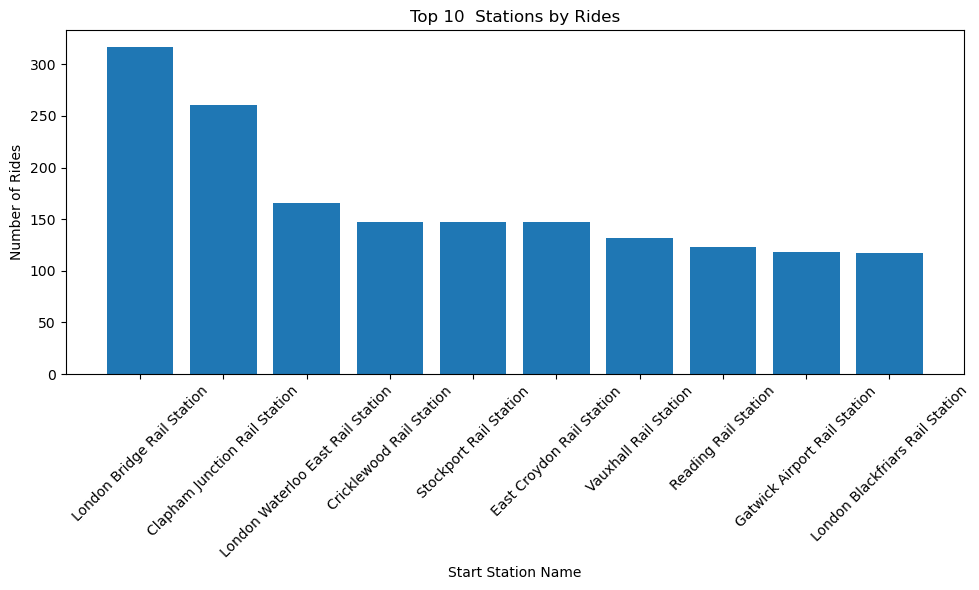

In [27]:
#Here are the top 10 most frequently visited stations overall.
plt.figure(figsize=(10, 6))  
plt.bar(top_10_popular_stations2.index, top_10_popular_stations2.values)
plt.xlabel('Start Station Name')
plt.ylabel('Number of Rides')
plt.title('Top 10  Stations by Rides')
plt.xticks(rotation=45)  
plt.tight_layout()  
plt.show()

In [28]:
merged["actual_arrival_time"] = pd.to_datetime(merged["actual_arrival_time"])
merged["actual_departure_time"] = pd.to_datetime(merged["actual_departure_time"])
merged["working_time_arrival"] = pd.to_datetime(merged["working_time_arrival"])
merged["working_time_departure"] = pd.to_datetime(merged["working_time_departure"])

In [29]:
column_values_head = merged['actual_arrival_time'].head()

print(column_values_head)

0   2023-07-27 00:53:00
1   2023-07-27 00:57:00
2   2023-07-27 01:07:00
3   2023-07-27 01:09:00
4                   NaT
Name: actual_arrival_time, dtype: datetime64[ns]


In [30]:
arrival = merged["actual_arrival_time"].value_counts()
print(arrival)

2023-07-27 17:50:00    99
2023-07-27 23:47:00    97
2023-07-27 18:08:00    92
2023-07-27 20:19:00    85
2023-07-27 17:39:00    84
                       ..
2023-07-28 02:34:00     1
2023-07-28 19:14:00     1
2023-07-27 02:34:00     1
2023-07-27 02:30:00     1
2023-07-28 02:21:00     1
Name: actual_arrival_time, Length: 2035, dtype: int64


In [31]:
#I extracted only the date of each arrival and departure and found that there are only three dates in this dataset.
merged['arrival_day'] = merged['actual_arrival_time'].dt.date
merged['departure_day']= merged['actual_departure_time'].dt.date

In [32]:
arrival2 = merged["arrival_day"].value_counts()
print(arrival2)

2023-07-28    16190
2023-07-27    15489
2023-07-29       90
Name: arrival_day, dtype: int64


In [33]:
departure = merged["departure_day"].value_counts()
print(departure)

2023-07-27    18064
2023-07-28    16236
2023-07-29       84
Name: departure_day, dtype: int64


In [34]:
df = merged.groupby(['arrival_day', 'StationName'])['StationName'].count().reset_index(name='Count')

# Sort values 
df = df.sort_values('Count', ascending=False).groupby('arrival_day').head(10).reset_index(drop=True)

print(df)

   arrival_day                                      StationName  Count
0   2023-07-28                       London Bridge Rail Station    158
1   2023-07-27                    Clapham Junction Rail Station    119
2   2023-07-27                       London Bridge Rail Station    113
3   2023-07-28                           Stockport Rail Station     97
4   2023-07-28                    Clapham Junction Rail Station     86
5   2023-07-28                         Cricklewood Rail Station     86
6   2023-07-28                London Waterloo East Rail Station     79
7   2023-07-28                            Vauxhall Rail Station     73
8   2023-07-28               Milton Keynes Central Rail Station     72
9   2023-07-27                             Reading Rail Station     72
10  2023-07-27                        East Croydon Rail Station     71
11  2023-07-28                            Stafford Rail Station     65
12  2023-07-28                            Lewisham Rail Station     63
13  20

Text(0.5, 1.0, 'Count by Station and Date')

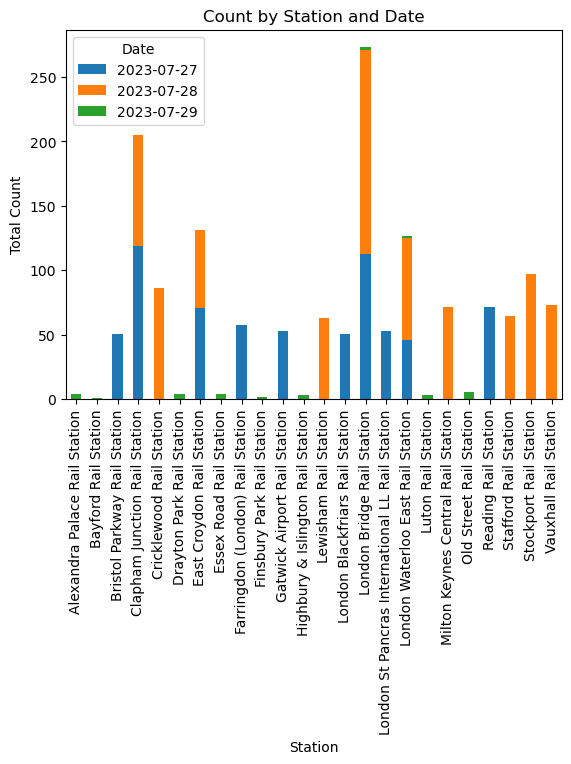

In [35]:
df.groupby(['StationName','arrival_day'])['Count'].sum().unstack().plot(kind='bar', stacked=True)

plt.xlabel('Station')
plt.ylabel('Total Count')
plt.legend(loc='upper left', title='Date')
plt.title('Count by Station and Date')

In [36]:
df2 = merged.groupby(['departure_day', 'StationName'])['StationName'].count().reset_index(name='Count')

# Sort values 
df2 = df2.sort_values('Count', ascending=False).groupby('departure_day').head(10).reset_index(drop=True)

print(df2)

   departure_day                                      StationName  Count
0     2023-07-28                       London Bridge Rail Station    158
1     2023-07-27                    Clapham Junction Rail Station    151
2     2023-07-27                       London Bridge Rail Station    127
3     2023-07-28                           Stockport Rail Station     97
4     2023-07-28                    Clapham Junction Rail Station     94
5     2023-07-28                         Cricklewood Rail Station     87
6     2023-07-27                             Reading Rail Station     82
7     2023-07-28                London Waterloo East Rail Station     80
8     2023-07-27                        East Croydon Rail Station     79
9     2023-07-28                            Vauxhall Rail Station     73
10    2023-07-28               Milton Keynes Central Rail Station     72
11    2023-07-27                 Farringdon (London) Rail Station     67
12    2023-07-28                            Staffor

In [54]:
merged.describe()

,StationNameLang,Easting,Northing,RevisionNumber,hour,departure_hour
count,0.0,34478.000000,34478.000000,34478.000000,31769.000000,34384.000000
mean,NaN,450134.278235,273481.362869,1.689657,14.275552,14.639629
std,NaN,101151.351384,160481.849395,0.822490,7.358909,7.303660
min,NaN,147588.000000,30599.000000,0.000000,0.000000,0.000000
25%,NaN,373328.750000,172145.000000,1.000000,7.000000,7.000000
50%,NaN,486656.000000,188785.000000,2.000000,17.000000,18.000000
75%,NaN,532380.000000,378800.000000,2.000000,21.000000,21.000000
max,NaN,652420.000000,904141.000000,7.000000,23.000000,23.000000


Text(0.5, 1.0, 'Count by Station and Date')

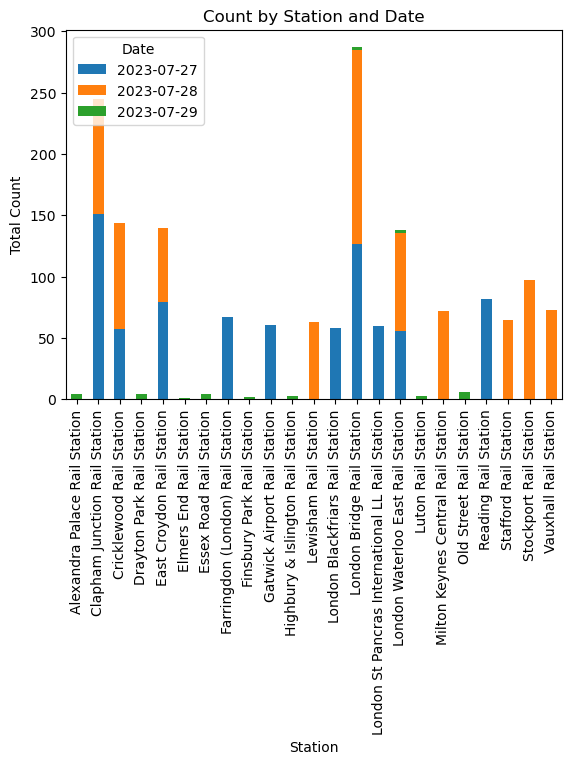

In [37]:
df2.groupby(['StationName','departure_day'])['Count'].sum().unstack().plot(kind='bar', stacked=True)

plt.xlabel('Station')
plt.ylabel('Total Count')
plt.legend(loc='upper left', title='Date')
plt.title('Count by Station and Date')

In [38]:
length_of_train = merged["train_length"].value_counts()
length_of_train.head(10)

8     3076
5     1875
4     1574
10    1103
12    1054
3      866
6      566
2      425
7       45
11       6
Name: train_length, dtype: int64

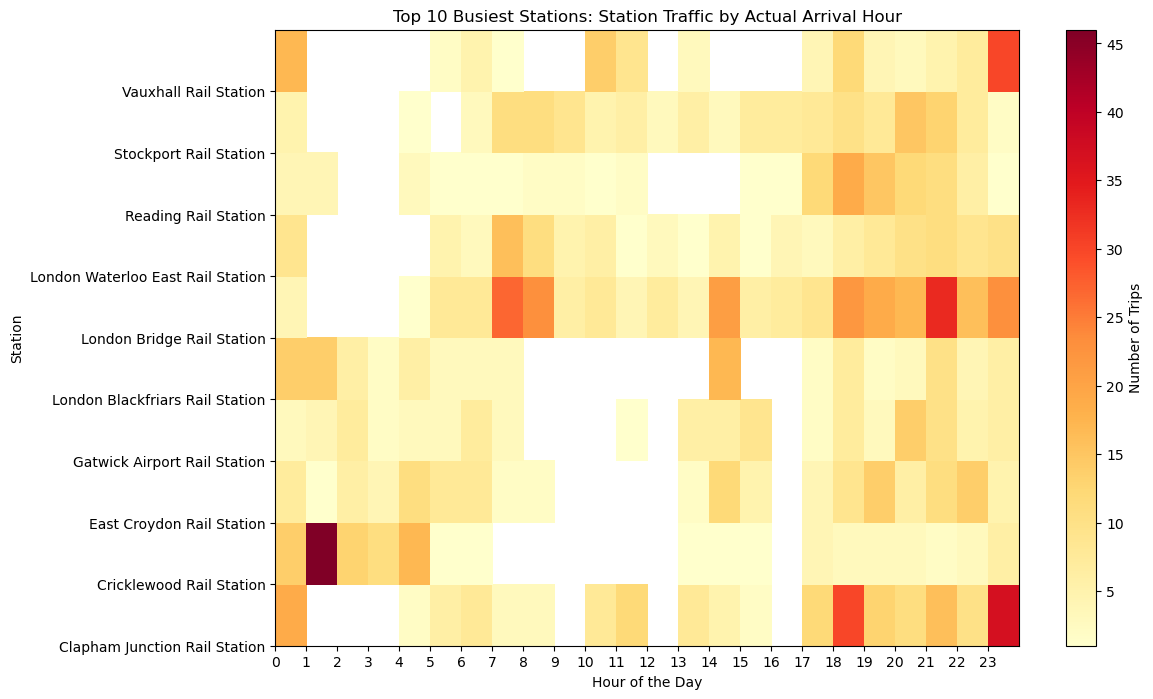

In [39]:
# Extract the hour from the actual_time_arrival column
merged['hour'] = merged['actual_arrival_time'].dt.hour

# Calculate the total number of trips for each station
station_total_trips = merged['StationName'].value_counts()

# Get the top 10 busiest stations
top_10_busy_stations = station_total_trips.head(10).index

# Filter the data for the top 10 stations
top_10_df = merged[merged['StationName'].isin(top_10_busy_stations)]

# Group by StationName and hour, then count occurrences
station_hourly_counts = top_10_df.groupby(['StationName', 'hour']).size().reset_index(name='count')

# Pivot the data for visualization
pivot_data = station_hourly_counts.pivot(index='StationName', columns='hour', values='count')

# Plot a heatmap to visualize the busiest hours for each top 10 station
plt.figure(figsize=(12, 8))
plt.pcolor(pivot_data, cmap='YlOrRd')
plt.colorbar(label='Number of Trips')
plt.xlabel('Hour of the Day')
plt.ylabel('Station')
plt.title('Top 10 Busiest Stations: Station Traffic by Actual Arrival Hour')
plt.xticks(range(24), range(24))
plt.yticks(range(len(pivot_data)), pivot_data.index)
plt.show()

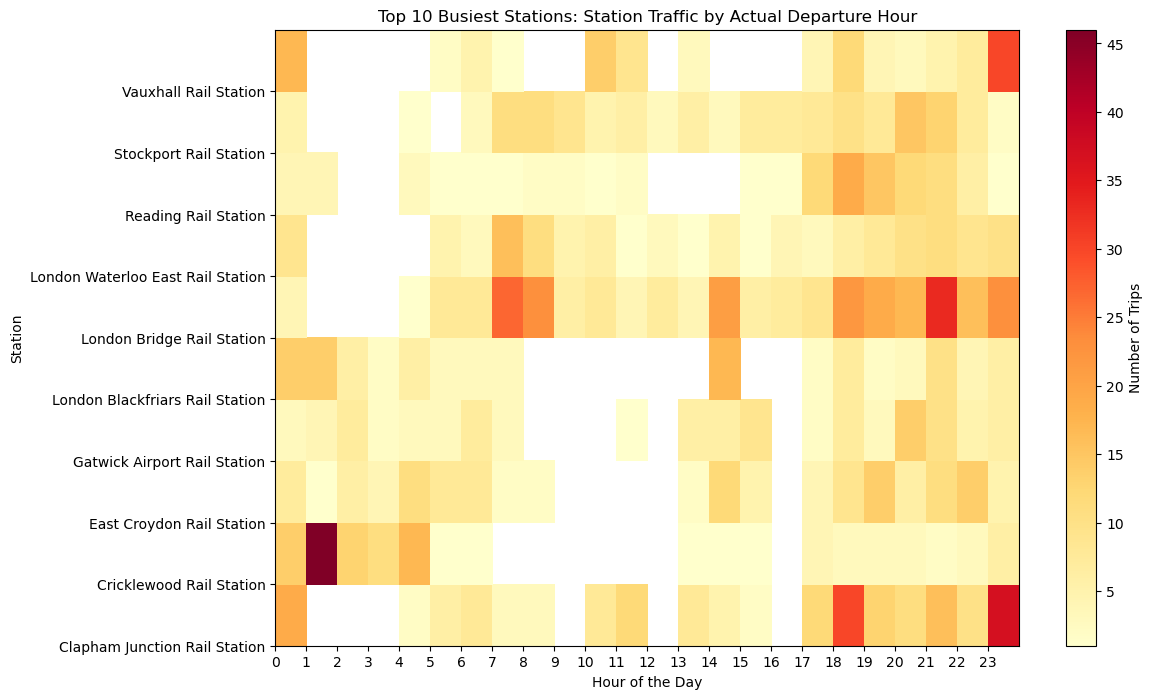

In [40]:
# Extract the hour from the departure_time_arrival column
merged['departure_hour'] = merged['actual_departure_time'].dt.hour

# Calculate the total number of trips for each station
station_total_trips2 = merged['StationName'].value_counts()

# Get the top 10 busiest stations
top_10_busy_stations2 = station_total_trips.head(10).index

# Filter the data for the top 10 stations
top_10_df2 = merged[merged['StationName'].isin(top_10_busy_stations2)]

# Group by StationName and hour, then count occurrences
station_hourly_counts2= top_10_df2.groupby(['StationName', 'hour']).size().reset_index(name='count')

# Pivot the data for visualization
pivot_data2 = station_hourly_counts2.pivot(index='StationName', columns='hour', values='count')

# Plot a heatmap to visualize the busiest hours for each top 10 station
plt.figure(figsize=(12, 8))
plt.pcolor(pivot_data, cmap='YlOrRd')
plt.colorbar(label='Number of Trips')
plt.xlabel('Hour of the Day')
plt.ylabel('Station')
plt.title('Top 10 Busiest Stations: Station Traffic by Actual Departure Hour')
plt.xticks(range(24), range(24))
plt.yticks(range(len(pivot_data)), pivot_data.index)
plt.show()

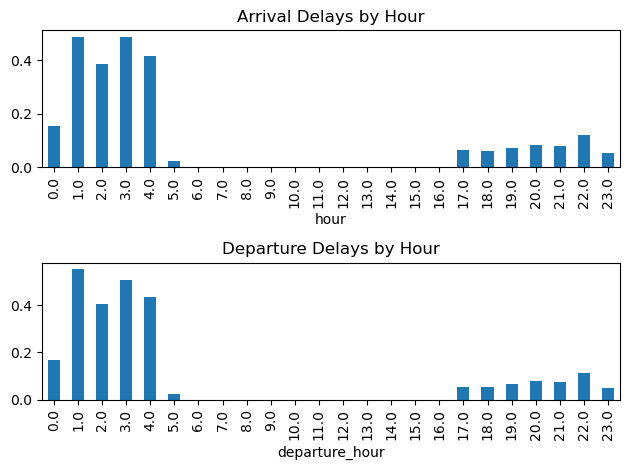

In [41]:
#Comparing arrival and departure delays with time of day can provide ways to look into certain areas on how to improve punctuality.
arrival_delays = merged.groupby('hour')['is_delayed_arrival'].mean()
departure_delays = merged.groupby('departure_hour')['is_delayed_departure'].mean()
fig, (ax1, ax2) = plt.subplots(2, 1)
arrival_delays.plot(kind='bar', title='Arrival Delays by Hour', ax=ax1)
departure_delays.plot(kind='bar', title='Departure Delays by Hour', ax=ax2)
plt.tight_layout()
plt.show()

In [42]:
delay_1 = merged[['hour','arrival_day','is_delayed_arrival']]

arrival_delays2 = delay_1.loc[delay_1['is_delayed_arrival'] == True]

count_arrival_delays = arrival_delays2.value_counts()

count_arrival_delays.head(20)

hour  arrival_day  is_delayed_arrival
22.0  2023-07-27   True                  296
1.0   2023-07-28   True                  269
21.0  2023-07-27   True                  221
20.0  2023-07-27   True                  220
0.0   2023-07-27   True                  215
1.0   2023-07-27   True                  185
19.0  2023-07-27   True                  185
18.0  2023-07-27   True                  149
23.0  2023-07-27   True                  147
4.0   2023-07-28   True                  132
17.0  2023-07-27   True                  105
3.0   2023-07-28   True                   72
2.0   2023-07-28   True                   61
0.0   2023-07-28   True                   51
2.0   2023-07-27   True                   27
5.0   2023-07-28   True                   24
3.0   2023-07-27   True                   11
4.0   2023-07-27   True                    8
6.0   2023-07-27   True                    4
5.0   2023-07-27   True                    2
dtype: int64

(3,)


It is found that there are more delays in the evening/night time. This could be due to more passengers boarding after work/school.The busiest stations per hour graph supports that possibility. It can also be due to system or equipment problems being more common after being used throughout the day. 

In [43]:
#Let's look at the stations with most delays and look into the details on each station.
delayed_stations_df = merged[merged['is_delayed_arrival'] == True] 
                            

station_delays = delayed_stations_df.groupby('StationName').size().reset_index(name='delay_count')

station_delays = station_delays.sort_values('delay_count', ascending=False).head(10)

print(station_delays)

                         StationName  delay_count
100         Cricklewood Rail Station           88
322            Stafford Rail Station           26
164           Haymarket Rail Station           23
210  London Blackfriars Rail Station           22
55      Bristol Parkway Rail Station           19
292           Sandhills Rail Station           18
276             Reading Rail Station           18
246             Norwich Rail Station           17
273        Preston Park Rail Station           16
127    Exeter St Davids Rail Station           16


After looking at the top busiest stations by hour, I looked into the top stations with most delays and saw that only one station appeared for both busiest and having most delays. However the other stations with delays did not appear in the busiest station graph. This shows that the fact the station may often receive delays which causes less people to visit.

In [44]:
#Compare the top 10 station with delays with the length of train.
train_df = merged[['StationName', 'train_length']] 

# Inner join on StationName  
train_length_df = station_delays.merge(train_df, on='StationName', how='inner')
train_length_df.head(10)

,StationName,delay_count,train_length
0,Cricklewood Rail Station,88,8
1,Cricklewood Rail Station,88,None
2,Cricklewood Rail Station,88,None
3,Cricklewood Rail Station,88,12
4,Cricklewood Rail Station,88,8
5,Cricklewood Rail Station,88,None
6,Cricklewood Rail Station,88,None
7,Cricklewood Rail Station,88,8
8,Cricklewood Rail Station,88,None
9,Cricklewood Rail Station,88,8


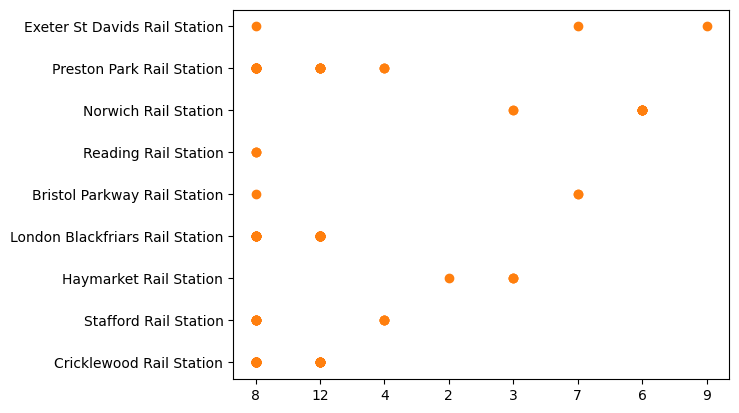

In [45]:
train_length_df = train_length_df.dropna()
plt.scatter(train_length_df['delay_count'], train_length_df['train_length'])
cleaned_train_length = train_length_df.fillna(0)
plt.scatter(cleaned_train_length['train_length'], cleaned_train_length['StationName'])

Further analysis will be needed but it seems like the train_length of 8 seems to be more common with delays. These trains can have infrastructure issue.  

In [ ]:
#Group delays by route_id to see which routes are most affected..
#Compare route id with train length. See if train_length need to be adjusted.

In [46]:
delayed_route_id = merged[merged['is_delayed_arrival'] == True] 
                            

delayed_route_id2 = delayed_route_id.groupby('route_id').size().reset_index(name='delay_count')

delayed_route_id3 = delayed_route_id2.sort_values('delay_count', ascending=False).head(10)

print(delayed_route_id3)

            route_id  delay_count
268  202307278354735           36
427  202307288953766           35
426  202307288953763           35
95   202307277679608           30
92   202307277679020           28
270  202307278354737           28
338  202307286707727           27
311  202307278935848           24
403  202307288077642           24
189  202307278075394           22


In [47]:
top_delay_hours = merged[['hour','route_id','is_delayed_arrival']]

top_hours = top_delay_hours.loc[top_delay_hours['is_delayed_arrival'] == True]

count_delays = top_hours.value_counts()

count_delays.head(10)

hour  route_id         is_delayed_arrival
19.0  202307278354735  True                  20
1.0   202307277679020  True                  18
      202307288953766  True                  15
19.0  202307277679608  True                  15
1.0   202307278953231  True                  14
4.0   202307288077642  True                  14
2.0   202307288953763  True                  14
20.0  202307278354735  True                  14
22.0  202307278057725  True                  13
1.0   202307278953351  True                  12
dtype: int64

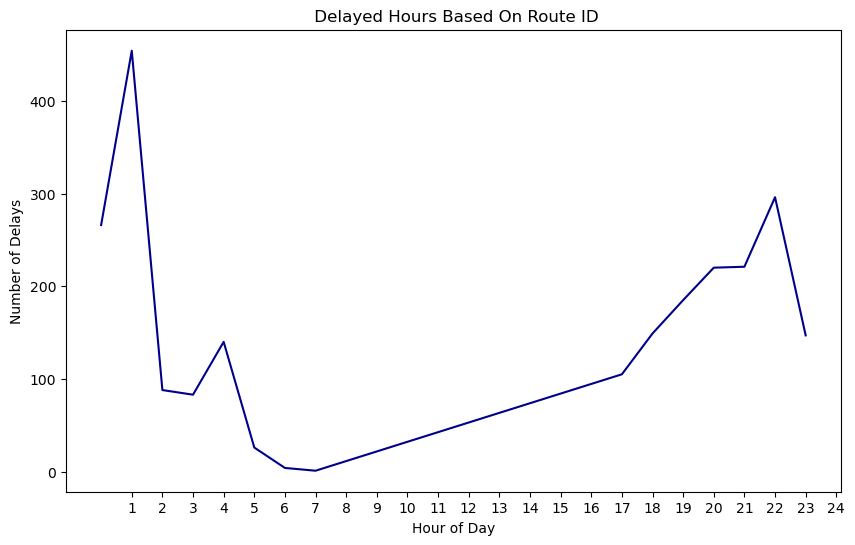

In [48]:
top_delay_hours = merged[['hour', 'route_id', 'is_delayed_arrival']]
top_hours = top_delay_hours[top_delay_hours['is_delayed_arrival'] == True]


count_delays = top_hours['hour'].value_counts().sort_index()


plt.figure(figsize=(10, 6))

count_delays.plot(kind='line', color='darkblue')

plt.xlabel('Hour of Day')
plt.ylabel('Number of Delays')
plt.title(' Delayed Hours Based On Route ID')

plt.xticks(range(1, 25))  

plt.show()

In [49]:
merged.corr()

C:\Users\roman\AppData\Local\Temp\ipykernel_12832\838552045.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  merged.corr()


,is_delayed_arrival,is_delayed_departure,StationNameLang,Easting,Northing,RevisionNumber,hour,departure_hour
is_delayed_arrival,1.000000,0.954546,NaN,-0.068969,-0.011006,0.028051,-0.089787,-0.100830
is_delayed_departure,0.954546,1.000000,NaN,-0.059175,-0.016135,0.026869,-0.089787,-0.118066
StationNameLang,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Easting,-0.068969,-0.059175,NaN,1.000000,-0.688024,0.032970,-0.144862,-0.124895
Northing,-0.011006,-0.016135,NaN,-0.688024,1.000000,-0.089493,0.159248,0.143113
RevisionNumber,0.028051,0.026869,NaN,0.032970,-0.089493,1.000000,0.011700,0.011465
hour,-0.089787,-0.089787,NaN,-0.144862,0.159248,0.011700,1.000000,0.996409
departure_hour,-0.100830,-0.118066,NaN,-0.124895,0.143113,0.011465,0.996409,1.000000


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, '202307278354735'),
  Text(1, 0, '202307288953766'),
  Text(2, 0, '202307288953763'),
  Text(3, 0, '202307277679608'),
  Text(4, 0, '202307277679020'),
  Text(5, 0, '202307278354737'),
  Text(6, 0, '202307286707727'),
  Text(7, 0, '202307278935848'),
  Text(8, 0, '202307288077642'),
  Text(9, 0, '202307278075394')])

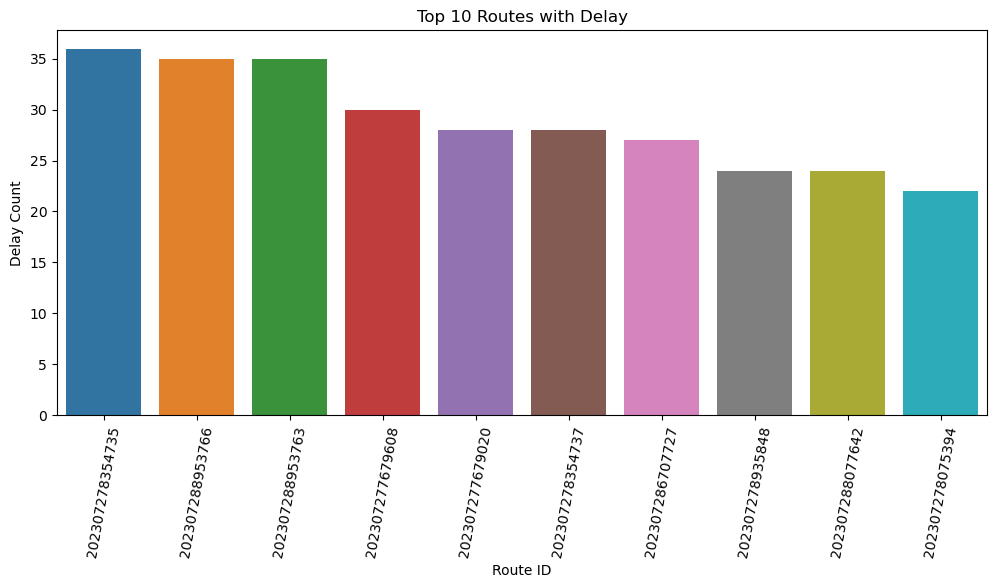

In [50]:
plt.figure(figsize=(12,5))
sns.barplot(data=delayed_route_id3, x='route_id', y='delay_count', ) 


plt.xlabel('Route ID')
plt.ylabel('Delay Count')
plt.title('Top 10 Routes with Delay')
plt.xticks(rotation=80)

In [51]:
delayed_df = merged[merged['is_delayed_arrival'] == True]

# Grouping by route_id and station 
delays = delayed_df.groupby(['route_id', 'StationName'])['is_delayed_arrival'].count().reset_index(name='delay_count')


top10 = delays.sort_values('delay_count', ascending=False).head(10)

print(top10)


            route_id                         StationName  delay_count
647  202307286707727            Cricklewood Rail Station           18
720  202307288953214            Cricklewood Rail Station           11
668  202307287627152              Wimbledon Rail Station            9
653  202307287167626  Manchester Piccadilly Rail Station            9
654  202307287167626       Salford Crescent Rail Station            9
28   202307276719880                Norwich Rail Station            9
675  202307288029795           Preston Park Rail Station            9
699  202307288077642       Exeter St Davids Rail Station            8
222  202307278000977                Norwich Rail Station            8
619  202307278935848                Partick Rail Station            8


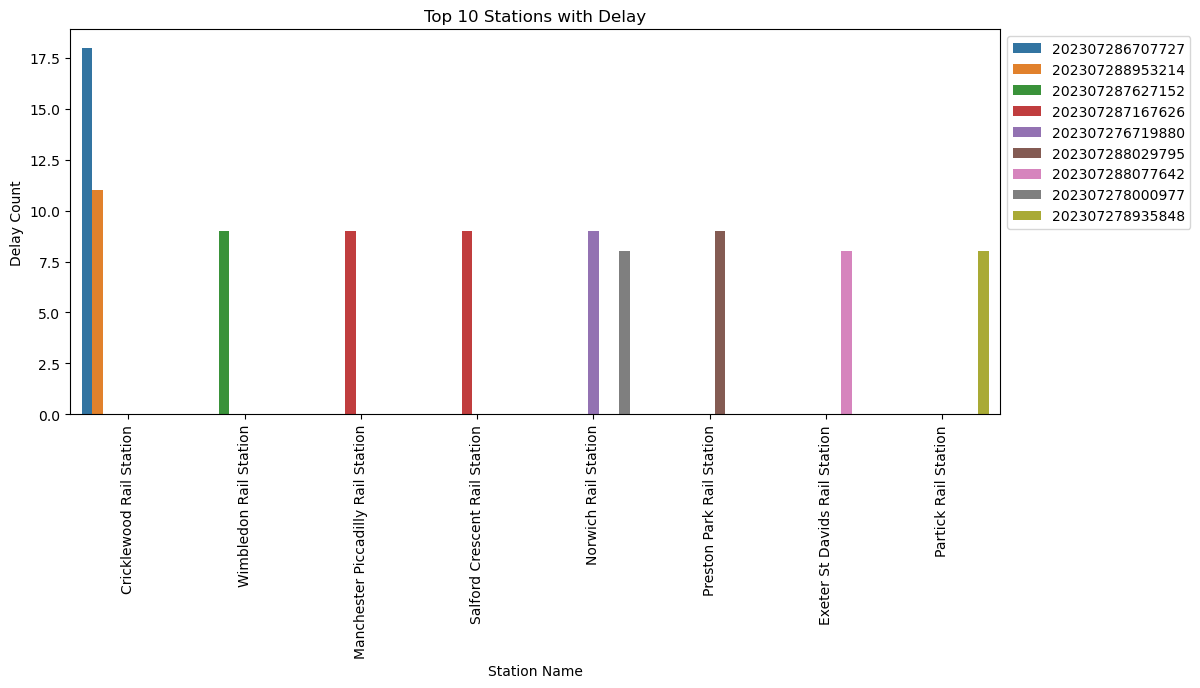

In [52]:
plt.figure(figsize=(12,5))

# Plot bars
sns.barplot(data=top10, x='StationName', y='delay_count', hue='route_id') 


plt.xlabel('Station Name')
plt.ylabel('Delay Count')
plt.title('Top 10 Stations with Delay')


plt.legend(bbox_to_anchor=(1,1), loc=2)  


plt.xticks(rotation=90) 

plt.show()

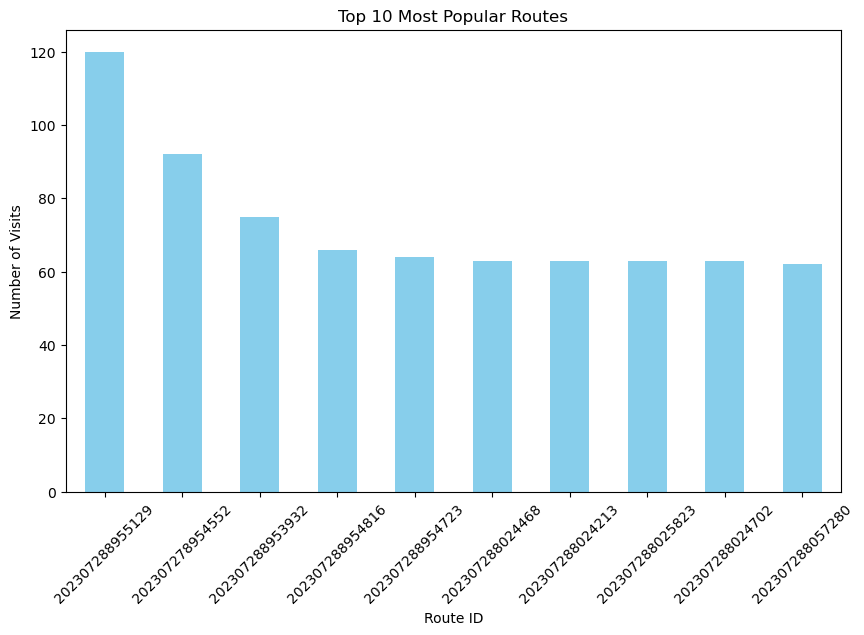

In [53]:
# Group by route ID and count the number of visits or departures
route_visits = merged['route_id'].value_counts()

# Sort the routes based on visit counts in descending order
sorted_routes = route_visits.sort_values(ascending=False)

# Select the top 10 routes with the highest visit counts
top_10_routes = sorted_routes.head(10)

# Create a bar plot
plt.figure(figsize=(10, 6))
top_10_routes.plot(kind='bar', color='skyblue')
plt.xlabel('Route ID')
plt.ylabel('Number of Visits')
plt.title('Top 10 Most Popular Routes')
plt.xticks(rotation=45)
plt.show()

Raw Data EDA

In [60]:
import psycopg2

# PostgreSQL variables
POSTGRES_USERNAME = "root"
POSTGRES_PASSWORD = "A3Z2RmYeFKaaxFZ0dv8b"
POSTGRES_HOSTNAME = "db-final-project.ctiwygyojfe8.us-east-1.rds.amazonaws.com"
POSTGRES_PORT = "5432"
POSTGRES_DBNAME = "postgres"
# Establish connection
conn = psycopg2.connect(
    host=POSTGRES_HOSTNAME,
    port=POSTGRES_PORT,
    dbname=POSTGRES_DBNAME,
    user=POSTGRES_USERNAME,
    password=POSTGRES_PASSWORD
)
# Create cursor
cursor = conn.cursor()
# Execute queries
query = "SELECT * FROM darwin"
cursor.execute(query)
# Fetch and print the first result
result = cursor.fetchone()
print(result)
# Commit and close
conn.commit()
# cursor.close()
# conn.close()

('202308178025940', 'P25940', datetime.date(2023, 8, 17), 'TD', 'CANALJ', None, datetime.time(0, 51), datetime.time(0, 56), None, None, datetime.time(0, 47), datetime.time(0, 48), None, None, None, None, None, None, False, False, None, None)


In [62]:
raw_df = pd.read_sql_query(query, conn)

C:\Users\roman\AppData\Local\Temp\ipykernel_12832\2528258861.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  raw_df = pd.read_sql_query(query, conn)


In [63]:
raw_df.head()

,route_id,unique_id,service_start_date,update_origin,train_platform,working_time_pass,working_time_arrival,working_time_departure,planned_time_arrival,planned_time_departure,...,platform,train_length,estimated_time,source,actual_time,actual_time_class,is_delayed_arrival,is_delayed_departure,source_instance,estimated_time_minutes
0,202308178025940,P25940,2023-08-17,TD,CANALJ,None,00:51:00,00:56:00,None,None,...,None,NaN,None,None,None,None,False,False,None,None
1,202308177171084,G71084,2023-08-17,TD,DRBY,None,00:56:30,01:03:30,None,None,...,4,NaN,None,None,None,None,False,False,None,None
2,202308167195848,G95848,2023-08-16,TD,HEADCRN,None,00:43:00,00:44:00,00:43:00,00:44:00,...,2,8.0,None,None,None,None,False,False,None,None
3,202308167195848,G95848,2023-08-16,TD,PLUCKLY,None,00:49:30,00:50:00,00:50:00,None,...,2,8.0,None,None,None,None,False,False,None,None
4,202308167195848,G95848,2023-08-16,TD,ASHFKY,None,00:59:00,01:06:00,00:59:00,01:06:00,...,5B,4.0,None,None,None,None,False,False,None,None


In [64]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17114 entries, 0 to 17113
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   route_id                17114 non-null  object 
 1   unique_id               17114 non-null  object 
 2   service_start_date      17114 non-null  object 
 3   update_origin           17098 non-null  object 
 4   train_platform          17114 non-null  object 
 5   working_time_pass       0 non-null      object 
 6   working_time_arrival    17114 non-null  object 
 7   working_time_departure  17114 non-null  object 
 8   planned_time_arrival    13971 non-null  object 
 9   planned_time_departure  13636 non-null  object 
 10  actual_arrival_time     15403 non-null  object 
 11  actual_departure_time   16100 non-null  object 
 12  platform                14607 non-null  object 
 13  train_length            3167 non-null   float64
 14  estimated_time          0 non-null    

In [87]:
print(raw_df.shape)

(17114, 22)


In [88]:
print(raw_df.isnull().sum())

route_id                      0
unique_id                     0
service_start_date            0
update_origin                16
train_platform                0
working_time_pass         17114
working_time_arrival          0
working_time_departure        0
planned_time_arrival       3143
planned_time_departure     3478
actual_arrival_time        1711
actual_departure_time      1014
platform                   2507
train_length              13947
estimated_time            17114
source                    17114
actual_time               17114
actual_time_class         17114
is_delayed_arrival            0
is_delayed_departure          0
source_instance           17114
estimated_time_minutes    17114
dtype: int64


In [89]:
merged_raw = pd.merge(raw_df, reference_data, on='train_platform', how='left')

In [90]:
merged_raw.head()

,route_id,unique_id,service_start_date,update_origin,train_platform,working_time_pass,working_time_arrival,working_time_departure,planned_time_arrival,planned_time_departure,...,CrsCode,StationName,StationNameLang,GridType,Easting,Northing,CreationDateTime,ModificationDateTime,RevisionNumber,Modification
0,202308178025940,P25940,2023-08-17,TD,CANALJ,None,00:51:00,00:56:00,None,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,202308177171084,G71084,2023-08-17,TD,DRBY,None,00:56:30,01:03:30,None,None,...,DBY,Derby Rail Station,NaN,U,436182.0,335593.0,2003-11-04T00:00:00,2013-11-12T18:24:34,1.0,rev
2,202308167195848,G95848,2023-08-16,TD,HEADCRN,None,00:43:00,00:44:00,00:43:00,00:44:00,...,HCN,Headcorn Rail Station,NaN,U,583800.0,144000.0,2003-11-04T00:00:00,2006-09-18T18:24:34,1.0,rev
3,202308167195848,G95848,2023-08-16,TD,PLUCKLY,None,00:49:30,00:50:00,00:50:00,None,...,PLC,Pluckley Rail Station,NaN,U,592221.0,143279.0,2005-04-21T00:00:00,2006-09-18T18:24:34,1.0,rev
4,202308167195848,G95848,2023-08-16,TD,ASHFKY,None,00:59:00,01:06:00,00:59:00,01:06:00,...,AFK,Ashford International Rail Station,NaN,U,601282.0,142204.0,2005-04-21T00:00:00,2007-02-13T17:06:21,4.0,rev


In [91]:
merged_raw.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17114 entries, 0 to 17113
Data columns (total 33 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   route_id                17114 non-null  object 
 1   unique_id               17114 non-null  object 
 2   service_start_date      17114 non-null  object 
 3   update_origin           17098 non-null  object 
 4   train_platform          17114 non-null  object 
 5   working_time_pass       0 non-null      object 
 6   working_time_arrival    17114 non-null  object 
 7   working_time_departure  17114 non-null  object 
 8   planned_time_arrival    13971 non-null  object 
 9   planned_time_departure  13636 non-null  object 
 10  actual_arrival_time     15403 non-null  object 
 11  actual_departure_time   16100 non-null  object 
 12  platform                14607 non-null  object 
 13  train_length            3167 non-null   float64
 14  estimated_time          0 non-null    

In [128]:
print(merged_raw.isnull().sum())

route_id                      0
unique_id                     0
service_start_date            0
update_origin                16
train_platform                0
working_time_pass         17114
working_time_arrival          0
working_time_departure        0
planned_time_arrival       3143
planned_time_departure     3478
actual_arrival_time        1711
actual_departure_time      1014
platform                   2507
train_length              13947
estimated_time            17114
source                    17114
actual_time               17114
actual_time_class         17114
is_delayed_arrival            0
is_delayed_departure          0
source_instance           17114
estimated_time_minutes    17114
AtcoCode                   1701
CrsCode                    1701
StationName                1701
StationNameLang           17114
GridType                   1720
Easting                    1701
Northing                   1701
CreationDateTime           1701
ModificationDateTime       1701
Revision

In [129]:
print(merged_raw.shape)

(17114, 33)


In [130]:
query = '''SELECT * 

FROM darwin
WHERE planned_time_arrival IS NOT NULL AND planned_time_departure IS NOT NULL'''

drop_list = ['working_time_pass', 'estimated_time',  'source', 'actual_time', 'actual_time_class', 'source_instance', 'estimated_time_minutes','StationNameLang']

df = merged_raw.drop(columns=drop_list)
clean_df = df.copy()
raw_df2 = merged_raw.drop(columns=drop_list)
clean_raw = raw_df2.copy()

In [141]:
print(clean_raw.shape)

(1438, 25)


In [135]:
print(clean_raw.isnull().sum())

route_id                      0
unique_id                     0
service_start_date            0
update_origin                16
train_platform                0
working_time_arrival          0
working_time_departure        0
planned_time_arrival       3143
planned_time_departure     3478
actual_arrival_time        1711
actual_departure_time      1014
platform                   2507
train_length              13947
is_delayed_arrival            0
is_delayed_departure          0
AtcoCode                   1701
CrsCode                    1701
StationName                1701
GridType                   1720
Easting                    1701
Northing                   1701
CreationDateTime           1701
ModificationDateTime       1701
RevisionNumber             1701
Modification               1701
dtype: int64


In [136]:
mask = clean_raw.isnull().any(axis=1) 

# Filter dataframe to drop rows with nulls
raw_df_clean =clean_raw[~mask]

In [137]:
print(raw_df_clean.shape)

(1438, 25)


In [143]:
station_names_raw = raw_df_clean['StationName'].value_counts()
top_10_popular_stations = station_names_raw.head(10)
print(top_10_popular_stations)

Thorpe Bay Rail Station              24
London Bridge Rail Station           23
Southend East Rail Station           22
Westcliff-on-Sea Rail Station        20
Finsbury Park Rail Station           18
Lewisham Rail Station                17
Chalkwell Rail Station               17
Southend Central Rail Station        17
London Waterloo East Rail Station    16
Leigh-on-Sea Rail Station            15
Name: StationName, dtype: int64


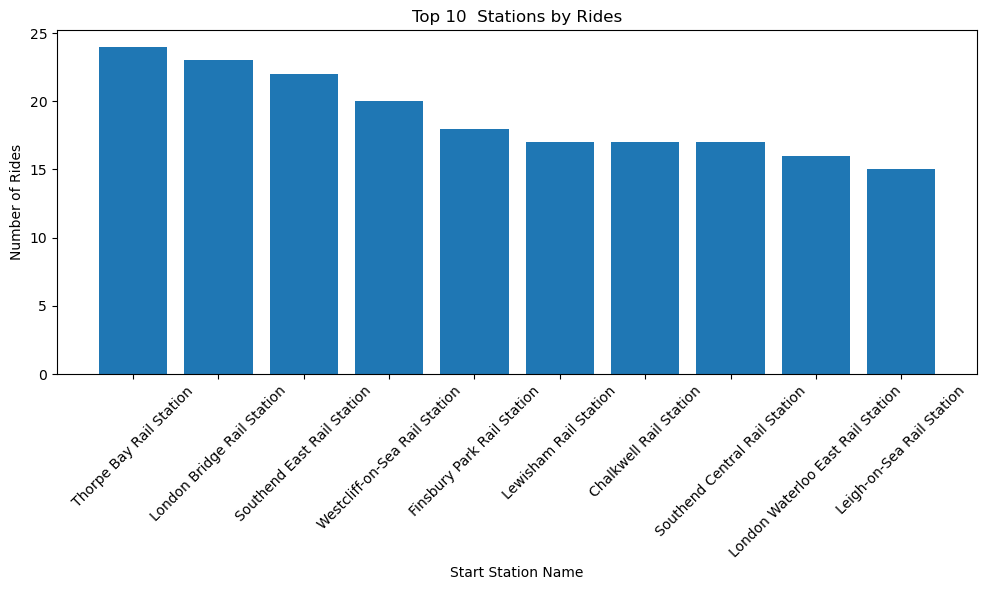

In [144]:
plt.figure(figsize=(10, 6))  
plt.bar(top_10_popular_stations.index, top_10_popular_stations.values)
plt.xlabel('Start Station Name')
plt.ylabel('Number of Rides')
plt.title('Top 10  Stations by Rides')
plt.xticks(rotation=45)  
plt.tight_layout()  
plt.show()

In [146]:
raw_df_clean["actual_arrival_time"] = pd.to_datetime(merged["actual_arrival_time"])
raw_df_clean["actual_departure_time"] = pd.to_datetime(merged["actual_departure_time"])
raw_df_clean["working_time_arrival"] = pd.to_datetime(merged["working_time_arrival"])
raw_df_clean["working_time_departure"] = pd.to_datetime(merged["working_time_departure"])

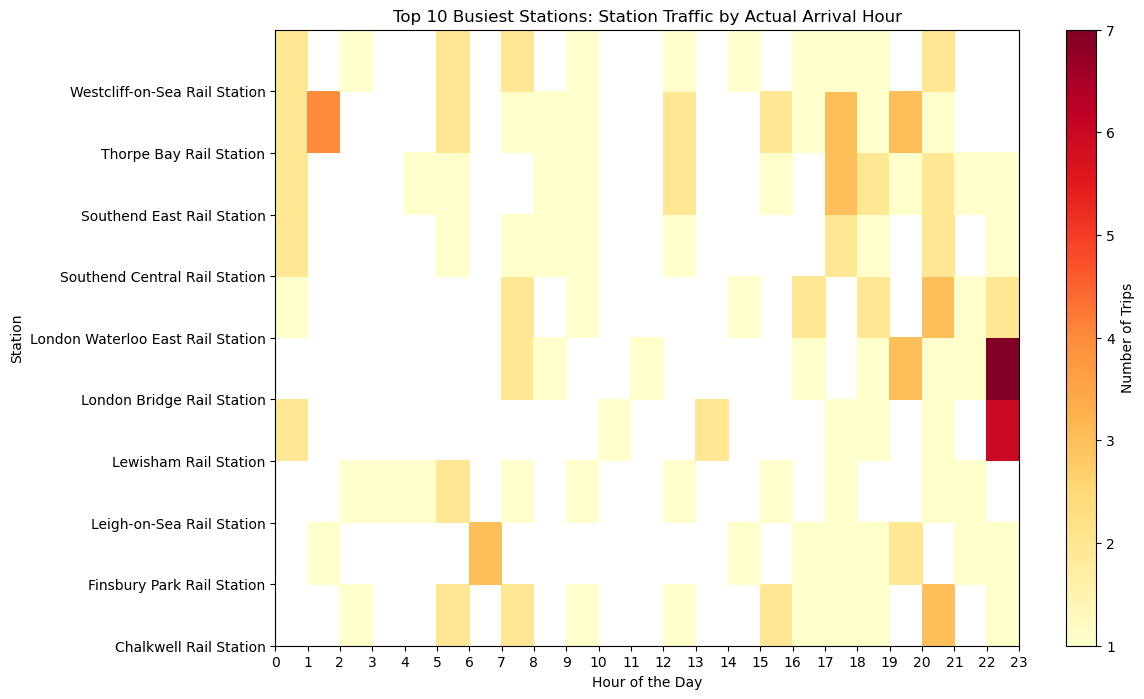

In [147]:
raw_df_clean['hour'] = raw_df_clean['actual_arrival_time'].dt.hour

# Calculate the total number of trips for each station
station_total_trips = raw_df_clean['StationName'].value_counts()

# Get the top 10 busiest stations
top_10_busy_stations = station_total_trips.head(10).index

# Filter the data for the top 10 stations
top_10_df = raw_df_clean[raw_df_clean['StationName'].isin(top_10_busy_stations)]

# Group by StationName and hour, then count occurrences
station_hourly_counts = top_10_df.groupby(['StationName', 'hour']).size().reset_index(name='count')

# Pivot the data for visualization
pivot_data = station_hourly_counts.pivot(index='StationName', columns='hour', values='count')

# Plot a heatmap to visualize the busiest hours for each top 10 station
plt.figure(figsize=(12, 8))
plt.pcolor(pivot_data, cmap='YlOrRd')
plt.colorbar(label='Number of Trips')
plt.xlabel('Hour of the Day')
plt.ylabel('Station')
plt.title('Top 10 Busiest Stations: Station Traffic by Actual Arrival Hour')
plt.xticks(range(24), range(24))
plt.yticks(range(len(pivot_data)), pivot_data.index)
plt.show()

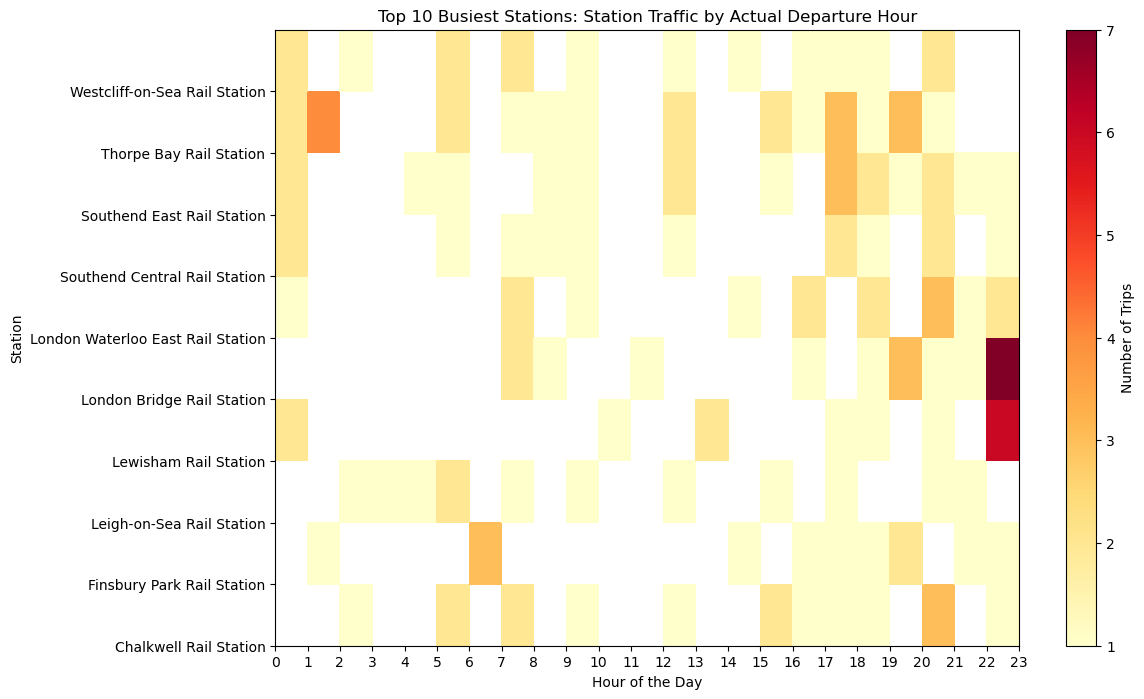

In [150]:
# Extract the hour from the departure_time_arrival column
raw_df_clean['departure_hour'] = raw_df_clean['actual_departure_time'].dt.hour

# Calculate the total number of trips for each station
station_total_trips2 = raw_df_clean['StationName'].value_counts()

# Get the top 10 busiest stations
top_10_busy_stations2 = station_total_trips.head(10).index

# Filter the data for the top 10 stations
top_10_df2 = raw_df_clean[raw_df_clean['StationName'].isin(top_10_busy_stations2)]

# Group by StationName and hour, then count occurrences
station_hourly_counts2= top_10_df2.groupby(['StationName', 'hour']).size().reset_index(name='count')

# Pivot the data for visualization
pivot_data2 = station_hourly_counts2.pivot(index='StationName', columns='hour', values='count')

# Plot a heatmap to visualize the busiest hours for each top 10 station
plt.figure(figsize=(12, 8))
plt.pcolor(pivot_data, cmap='YlOrRd')
plt.colorbar(label='Number of Trips')
plt.xlabel('Hour of the Day')
plt.ylabel('Station')
plt.title('Top 10 Busiest Stations: Station Traffic by Actual Departure Hour')
plt.xticks(range(24), range(24))
plt.yticks(range(len(pivot_data)), pivot_data.index)
plt.show()

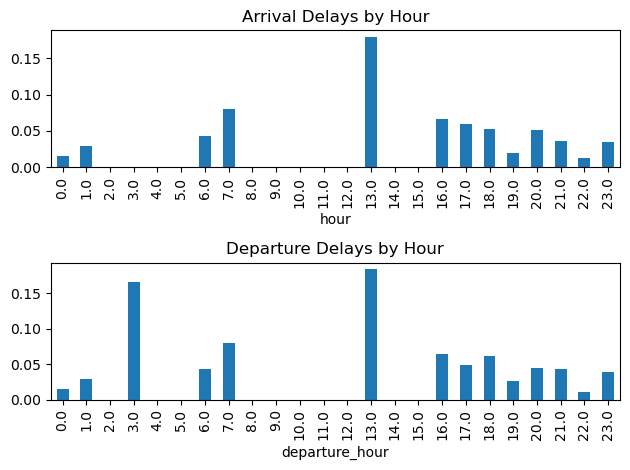

In [151]:
#Comparing arrival and departure delays with time of day can provide ways to look into certain areas on how to improve punctuality.
arrival_delays = raw_df_clean.groupby('hour')['is_delayed_arrival'].mean()
departure_delays = raw_df_clean.groupby('departure_hour')['is_delayed_departure'].mean()
fig, (ax1, ax2) = plt.subplots(2, 1)
arrival_delays.plot(kind='bar', title='Arrival Delays by Hour', ax=ax1)
departure_delays.plot(kind='bar', title='Departure Delays by Hour', ax=ax2)
plt.tight_layout()
plt.show()

In [152]:
raw_df_clean['arrival_day'] = raw_df_clean['actual_arrival_time'].dt.date
raw_df_clean['departure_day']= raw_df_clean['actual_departure_time'].dt.date

In [153]:
delayed_route_id = raw_df_clean[raw_df_clean['is_delayed_arrival'] == True] 
                            

delayed_route_id2 = delayed_route_id.groupby('route_id').size().reset_index(name='delay_count')

delayed_route_id3 = delayed_route_id2.sort_values('delay_count', ascending=False).head(10)

print(delayed_route_id3)

          route_id  delay_count
2  202308178840216           16
3  202308178952240           14
0  202308177684956           13
4  202308187019234            7
1  202308178056477            3


In [154]:
top_delay_hours = raw_df_clean[['hour','route_id','is_delayed_arrival']]

top_hours = top_delay_hours.loc[top_delay_hours['is_delayed_arrival'] == True]

count_delays = top_hours.value_counts()

count_delays.head(10)

hour  route_id         is_delayed_arrival
13.0  202308178840216  True                  7
7.0   202308177684956  True                  5
20.0  202308178952240  True                  4
17.0  202308178840216  True                  4
18.0  202308178840216  True                  4
21.0  202308187019234  True                  4
6.0   202308178952240  True                  3
23.0  202308177684956  True                  2
0.0   202308178952240  True                  1
23.0  202308178952240  True                  1
dtype: int64

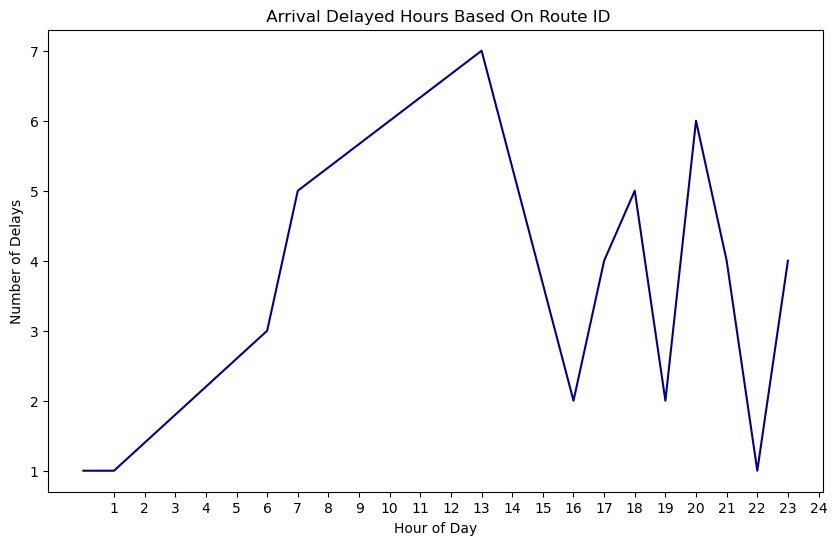

In [161]:
top_delay_hours = raw_df_clean[['hour', 'route_id', 'is_delayed_arrival']]
top_hours = top_delay_hours[top_delay_hours['is_delayed_arrival'] == True]


count_delays = top_hours['hour'].value_counts().sort_index()


plt.figure(figsize=(10, 6))

count_delays.plot(kind='line', color='darkblue')

plt.xlabel('Hour of Day')
plt.ylabel('Number of Delays')
plt.title(' Arrival Delayed Hours Based On Route ID')

plt.xticks(range(1, 25))  

plt.show()

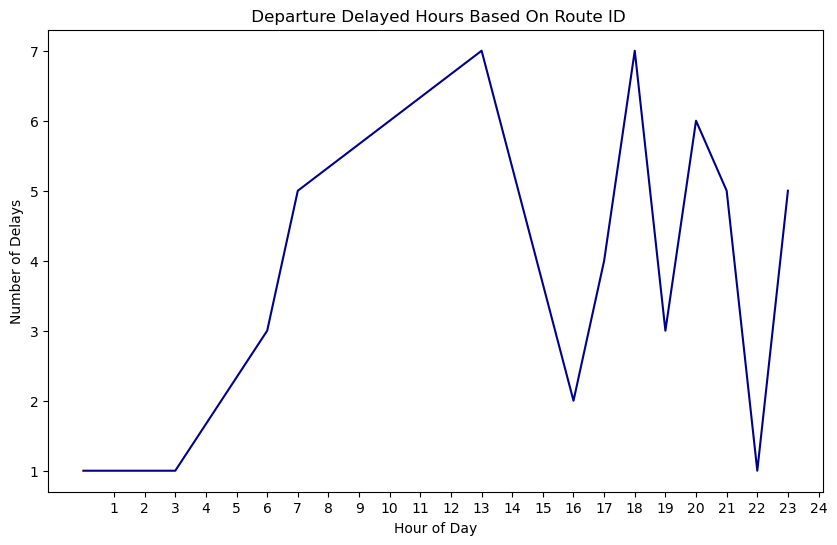

In [164]:
top_delay_hours2 = raw_df_clean[['departure_hour', 'route_id', 'is_delayed_departure']]
top_hours2 = top_delay_hours2[top_delay_hours2['is_delayed_departure'] == True]


count_delays = top_hours2['departure_hour'].value_counts().sort_index()


plt.figure(figsize=(10, 6))

count_delays.plot(kind='line', color='darkblue')

plt.xlabel('Hour of Day')
plt.ylabel('Number of Delays')
plt.title(' Departure Delayed Hours Based On Route ID')

plt.xticks(range(1, 25))  

plt.show()

Operational issues like crew availability, equipment failures happening at all hours. Some other potential causes will be needed to  investigate for the delays to occur throughout the day. 

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, '202308178840216'),
  Text(1, 0, '202308178952240'),
  Text(2, 0, '202308177684956'),
  Text(3, 0, '202308187019234'),
  Text(4, 0, '202308178056477')])

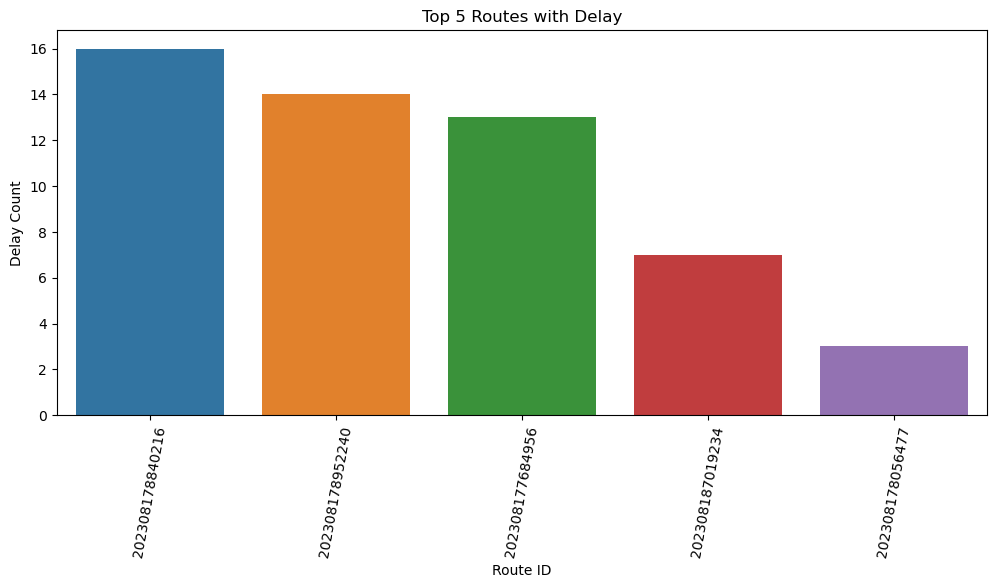

In [157]:
plt.figure(figsize=(12,5))
sns.barplot(data=delayed_route_id3, x='route_id', y='delay_count', ) 


plt.xlabel('Route ID')
plt.ylabel('Delay Count')
plt.title('Top 5 Routes with Delay')
plt.xticks(rotation=80)

In [158]:
delayed_df = raw_df_clean[raw_df_clean['is_delayed_arrival'] == True]

# Grouping by route_id and station 
delays = delayed_df.groupby(['route_id', 'StationName'])['is_delayed_arrival'].count().reset_index(name='delay_count')


top10 = delays.sort_values('delay_count', ascending=False).head(10)

print(top10)

           route_id                                      StationName  \
35  202308178952240                          Gipsy Hill Rail Station   
32  202308178952240                              Balham Rail Station   
38  202308178952240                        West Norwood Rail Station   
37  202308178952240                      Streatham Hill Rail Station   
36  202308178952240                    Norwood Junction Rail Station   
34  202308178952240                      Crystal Palace Rail Station   
33  202308178952240                    Clapham Junction Rail Station   
25  202308178840216  London St Pancras International LL Rail Station   
26  202308178840216               Luton Airport Parkway Rail Station   
27  202308178840216                               Luton Rail Station   

    delay_count  
35            2  
32            2  
38            2  
37            2  
36            2  
34            2  
33            2  
25            1  
26            1  
27            1  


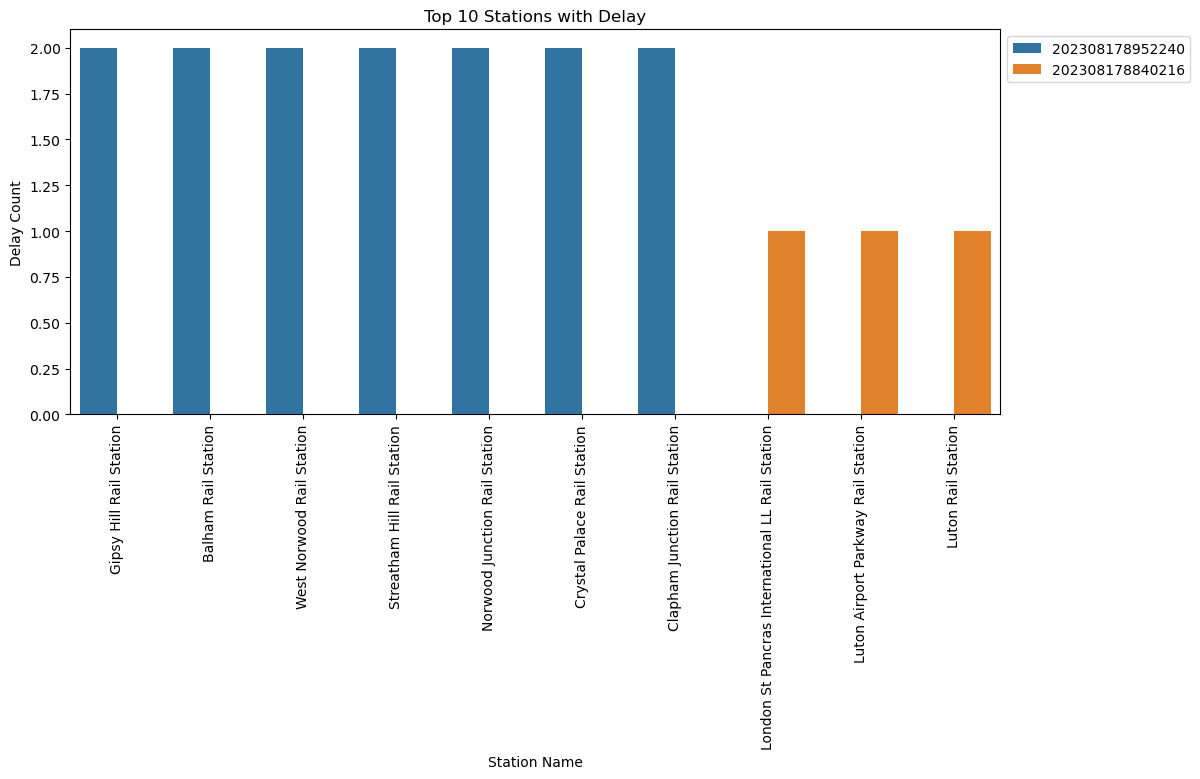

In [159]:
plt.figure(figsize=(12,5))

# Plot bars
sns.barplot(data=top10, x='StationName', y='delay_count', hue='route_id') 


plt.xlabel('Station Name')
plt.ylabel('Delay Count')
plt.title('Top 10 Stations with Delay')


plt.legend(bbox_to_anchor=(1,1), loc=2)  


plt.xticks(rotation=90) 

plt.show()

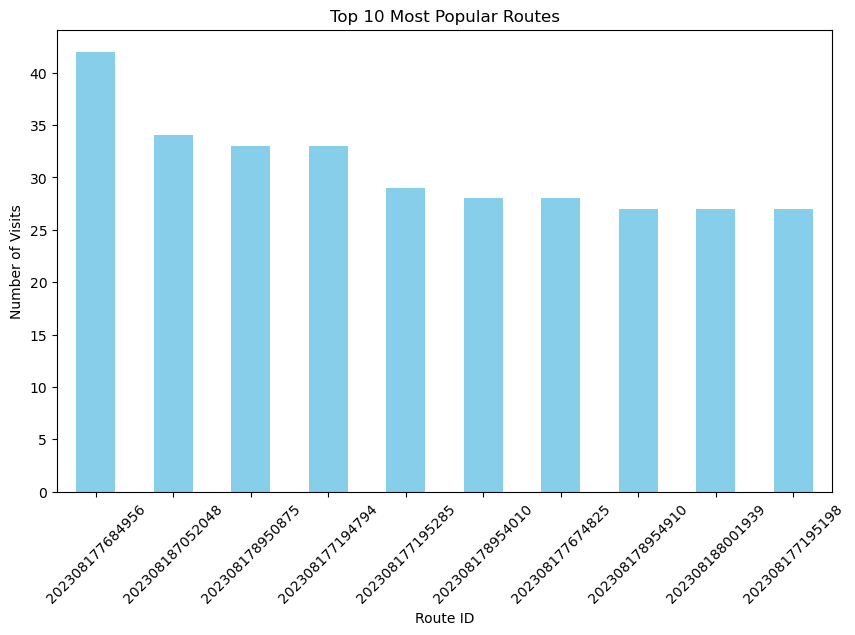

In [160]:
# Group by route ID and count the number of visits or departures
route_visits = raw_df_clean['route_id'].value_counts()

# Sort the routes based on visit counts in descending order
sorted_routes = route_visits.sort_values(ascending=False)

# Select the top 10 routes with the highest visit counts
top_10_routes = sorted_routes.head(10)

# Create a bar plot
plt.figure(figsize=(10, 6))
top_10_routes.plot(kind='bar', color='skyblue')
plt.xlabel('Route ID')
plt.ylabel('Number of Visits')
plt.title('Top 10 Most Popular Routes')
plt.xticks(rotation=45)
plt.show()